In [1]:
import shutil
from pathlib import Path
import json
from tqdm import tqdm

import torch
import nibabel as nib

from slice_inflate.datasets.clinical_cardiac_views import get_sub_sp_tensor, display_clinical_views, get_clinical_cardiac_view_affines


In [7]:
C3D = "/home/weihsbach/storage/staff/christianweihsbach/c3d/c3d-1.4.0-Linux-gcc64/bin/c3d"
MMWHS_BASE_PATH = "../../data/datasets/MMWHS"

assert Path(MMWHS_BASE_PATH).is_dir()

split_file_path = Path(MMWHS_BASE_PATH, 'prepared_files/metadata/data_split.json')
split_file_path.parent.mkdir(exist_ok=True, parents=True)
metadata_file_path = Path(MMWHS_BASE_PATH, 'prepared_files/metadata/metadata.json')

# Split dataset

In [8]:
if False:
    test_cases = [1001,1002,1003,1005,1006]
    train_cases = set(range(1001,1021)) - set(test_cases)
    train_cases = list(train_cases)

    base_ct_paths = list(Path(MMWHS_BASE_PATH, 'base_files/ct_train').glob('*.nii.gz'))
    base_mr_paths = list(Path(MMWHS_BASE_PATH, 'base_files/mr_train').glob('*.nii.gz'))

    base_paths = base_ct_paths + base_mr_paths

    for p in tqdm(base_paths):
        dest_path = Path(MMWHS_BASE_PATH, 'prepared_files', p.name)
        dest_path.parent.mkdir(exist_ok=True)
        tqdm.write(f"{p} -> {dest_path}")
        shutil.copy(p, dest_path)

    prepared_paths = list(Path(MMWHS_BASE_PATH, 'prepared_files').resolve().glob('*.nii.gz'))
    train_paths = sorted(filter(lambda _path: any([str(c) in str(_path) for c in train_cases]), prepared_paths))
    test_paths = sorted(filter(lambda _path: any([str(c) in str(_path) for c in test_cases]), prepared_paths))

    split_dict = dict(
        train_files=[str(p) for p in train_paths],
        test_files=[str(p) for p in test_paths]
    )

    with open(split_file_path, 'w') as f:
        json.dump(split_dict, f, indent=4)

  0%|          | 0/80 [00:00<?, ?it/s]

../../data/datasets/MMWHS/base_files/ct_train/ct_train_1013_image.nii.gz -> ../../data/datasets/MMWHS/prepared_files/ct_train_1013_image.nii.gz


  2%|▎         | 2/80 [00:00<00:15,  4.97it/s]

../../data/datasets/MMWHS/base_files/ct_train/ct_train_1004_image.nii.gz -> ../../data/datasets/MMWHS/prepared_files/ct_train_1004_image.nii.gz
../../data/datasets/MMWHS/base_files/ct_train/ct_train_1004_label.nii.gz -> ../../data/datasets/MMWHS/prepared_files/ct_train_1004_label.nii.gz


  2%|▎         | 2/80 [00:00<00:15,  4.97it/s]

../../data/datasets/MMWHS/base_files/ct_train/ct_train_1007_image.nii.gz -> ../../data/datasets/MMWHS/prepared_files/ct_train_1007_image.nii.gz


  5%|▌         | 4/80 [00:00<00:11,  6.35it/s]

../../data/datasets/MMWHS/base_files/ct_train/ct_train_1007_label.nii.gz -> ../../data/datasets/MMWHS/prepared_files/ct_train_1007_label.nii.gz
../../data/datasets/MMWHS/base_files/ct_train/ct_train_1008_image.nii.gz -> ../../data/datasets/MMWHS/prepared_files/ct_train_1008_image.nii.gz


  8%|▊         | 6/80 [00:00<00:10,  6.92it/s]

../../data/datasets/MMWHS/base_files/ct_train/ct_train_1008_label.nii.gz -> ../../data/datasets/MMWHS/prepared_files/ct_train_1008_label.nii.gz
../../data/datasets/MMWHS/base_files/ct_train/ct_train_1009_image.nii.gz -> ../../data/datasets/MMWHS/prepared_files/ct_train_1009_image.nii.gz


 10%|█         | 8/80 [00:01<00:15,  4.57it/s]

../../data/datasets/MMWHS/base_files/ct_train/ct_train_1009_label.nii.gz -> ../../data/datasets/MMWHS/prepared_files/ct_train_1009_label.nii.gz
../../data/datasets/MMWHS/base_files/ct_train/ct_train_1010_image.nii.gz -> ../../data/datasets/MMWHS/prepared_files/ct_train_1010_image.nii.gz


 12%|█▎        | 10/80 [00:01<00:14,  4.87it/s]

../../data/datasets/MMWHS/base_files/ct_train/ct_train_1010_label.nii.gz -> ../../data/datasets/MMWHS/prepared_files/ct_train_1010_label.nii.gz
../../data/datasets/MMWHS/base_files/ct_train/ct_train_1011_image.nii.gz -> ../../data/datasets/MMWHS/prepared_files/ct_train_1011_image.nii.gz


 15%|█▌        | 12/80 [00:02<00:12,  5.47it/s]

../../data/datasets/MMWHS/base_files/ct_train/ct_train_1011_label.nii.gz -> ../../data/datasets/MMWHS/prepared_files/ct_train_1011_label.nii.gz
../../data/datasets/MMWHS/base_files/ct_train/ct_train_1012_image.nii.gz -> ../../data/datasets/MMWHS/prepared_files/ct_train_1012_image.nii.gz


 18%|█▊        | 14/80 [00:02<00:10,  6.19it/s]

../../data/datasets/MMWHS/base_files/ct_train/ct_train_1012_label.nii.gz -> ../../data/datasets/MMWHS/prepared_files/ct_train_1012_label.nii.gz
../../data/datasets/MMWHS/base_files/ct_train/ct_train_1013_label.nii.gz -> ../../data/datasets/MMWHS/prepared_files/ct_train_1013_label.nii.gz
../../data/datasets/MMWHS/base_files/ct_train/ct_train_1014_image.nii.gz -> ../../data/datasets/MMWHS/prepared_files/ct_train_1014_image.nii.gz


 21%|██▏       | 17/80 [00:02<00:09,  6.86it/s]

../../data/datasets/MMWHS/base_files/ct_train/ct_train_1014_label.nii.gz -> ../../data/datasets/MMWHS/prepared_files/ct_train_1014_label.nii.gz
../../data/datasets/MMWHS/base_files/ct_train/ct_train_1015_image.nii.gz -> ../../data/datasets/MMWHS/prepared_files/ct_train_1015_image.nii.gz


 24%|██▍       | 19/80 [00:03<00:09,  6.26it/s]

../../data/datasets/MMWHS/base_files/ct_train/ct_train_1015_label.nii.gz -> ../../data/datasets/MMWHS/prepared_files/ct_train_1015_label.nii.gz
../../data/datasets/MMWHS/base_files/ct_train/ct_train_1016_image.nii.gz -> ../../data/datasets/MMWHS/prepared_files/ct_train_1016_image.nii.gz


 26%|██▋       | 21/80 [00:03<00:10,  5.57it/s]

../../data/datasets/MMWHS/base_files/ct_train/ct_train_1016_label.nii.gz -> ../../data/datasets/MMWHS/prepared_files/ct_train_1016_label.nii.gz
../../data/datasets/MMWHS/base_files/ct_train/ct_train_1017_image.nii.gz -> ../../data/datasets/MMWHS/prepared_files/ct_train_1017_image.nii.gz


 29%|██▉       | 23/80 [00:04<00:10,  5.62it/s]

../../data/datasets/MMWHS/base_files/ct_train/ct_train_1017_label.nii.gz -> ../../data/datasets/MMWHS/prepared_files/ct_train_1017_label.nii.gz
../../data/datasets/MMWHS/base_files/ct_train/ct_train_1018_image.nii.gz -> ../../data/datasets/MMWHS/prepared_files/ct_train_1018_image.nii.gz


 31%|███▏      | 25/80 [00:04<00:09,  5.68it/s]

../../data/datasets/MMWHS/base_files/ct_train/ct_train_1018_label.nii.gz -> ../../data/datasets/MMWHS/prepared_files/ct_train_1018_label.nii.gz
../../data/datasets/MMWHS/base_files/ct_train/ct_train_1019_image.nii.gz -> ../../data/datasets/MMWHS/prepared_files/ct_train_1019_image.nii.gz


 34%|███▍      | 27/80 [00:04<00:10,  5.29it/s]

../../data/datasets/MMWHS/base_files/ct_train/ct_train_1019_label.nii.gz -> ../../data/datasets/MMWHS/prepared_files/ct_train_1019_label.nii.gz
../../data/datasets/MMWHS/base_files/ct_train/ct_train_1020_image.nii.gz -> ../../data/datasets/MMWHS/prepared_files/ct_train_1020_image.nii.gz


 36%|███▋      | 29/80 [00:05<00:10,  4.74it/s]

../../data/datasets/MMWHS/base_files/ct_train/ct_train_1020_label.nii.gz -> ../../data/datasets/MMWHS/prepared_files/ct_train_1020_label.nii.gz
../../data/datasets/MMWHS/base_files/ct_train/ct_train_1001_image.nii.gz -> ../../data/datasets/MMWHS/prepared_files/ct_train_1001_image.nii.gz


 39%|███▉      | 31/80 [00:05<00:11,  4.43it/s]

../../data/datasets/MMWHS/base_files/ct_train/ct_train_1001_label.nii.gz -> ../../data/datasets/MMWHS/prepared_files/ct_train_1001_label.nii.gz
../../data/datasets/MMWHS/base_files/ct_train/ct_train_1002_image.nii.gz -> ../../data/datasets/MMWHS/prepared_files/ct_train_1002_image.nii.gz


 41%|████▏     | 33/80 [00:06<00:09,  4.79it/s]

../../data/datasets/MMWHS/base_files/ct_train/ct_train_1002_label.nii.gz -> ../../data/datasets/MMWHS/prepared_files/ct_train_1002_label.nii.gz
../../data/datasets/MMWHS/base_files/ct_train/ct_train_1003_image.nii.gz -> ../../data/datasets/MMWHS/prepared_files/ct_train_1003_image.nii.gz


 44%|████▍     | 35/80 [00:06<00:09,  4.82it/s]

../../data/datasets/MMWHS/base_files/ct_train/ct_train_1003_label.nii.gz -> ../../data/datasets/MMWHS/prepared_files/ct_train_1003_label.nii.gz
../../data/datasets/MMWHS/base_files/ct_train/ct_train_1005_image.nii.gz -> ../../data/datasets/MMWHS/prepared_files/ct_train_1005_image.nii.gz


 46%|████▋     | 37/80 [00:06<00:07,  5.51it/s]

../../data/datasets/MMWHS/base_files/ct_train/ct_train_1005_label.nii.gz -> ../../data/datasets/MMWHS/prepared_files/ct_train_1005_label.nii.gz
../../data/datasets/MMWHS/base_files/ct_train/ct_train_1006_image.nii.gz -> ../../data/datasets/MMWHS/prepared_files/ct_train_1006_image.nii.gz


 51%|█████▏    | 41/80 [00:07<00:05,  7.22it/s]

../../data/datasets/MMWHS/base_files/ct_train/ct_train_1006_label.nii.gz -> ../../data/datasets/MMWHS/prepared_files/ct_train_1006_label.nii.gz
../../data/datasets/MMWHS/base_files/mr_train/mr_train_1004_image.nii.gz -> ../../data/datasets/MMWHS/prepared_files/mr_train_1004_image.nii.gz
../../data/datasets/MMWHS/base_files/mr_train/mr_train_1004_label.nii.gz -> ../../data/datasets/MMWHS/prepared_files/mr_train_1004_label.nii.gz
../../data/datasets/MMWHS/base_files/mr_train/mr_train_1007_image.nii.gz -> ../../data/datasets/MMWHS/prepared_files/mr_train_1007_image.nii.gz


 56%|█████▋    | 45/80 [00:07<00:03,  9.97it/s]

../../data/datasets/MMWHS/base_files/mr_train/mr_train_1007_label.nii.gz -> ../../data/datasets/MMWHS/prepared_files/mr_train_1007_label.nii.gz
../../data/datasets/MMWHS/base_files/mr_train/mr_train_1008_image.nii.gz -> ../../data/datasets/MMWHS/prepared_files/mr_train_1008_image.nii.gz
../../data/datasets/MMWHS/base_files/mr_train/mr_train_1008_label.nii.gz -> ../../data/datasets/MMWHS/prepared_files/mr_train_1008_label.nii.gz
../../data/datasets/MMWHS/base_files/mr_train/mr_train_1009_image.nii.gz -> ../../data/datasets/MMWHS/prepared_files/mr_train_1009_image.nii.gz


 61%|██████▏   | 49/80 [00:08<00:02, 10.39it/s]

../../data/datasets/MMWHS/base_files/mr_train/mr_train_1009_label.nii.gz -> ../../data/datasets/MMWHS/prepared_files/mr_train_1009_label.nii.gz
../../data/datasets/MMWHS/base_files/mr_train/mr_train_1010_image.nii.gz -> ../../data/datasets/MMWHS/prepared_files/mr_train_1010_image.nii.gz
../../data/datasets/MMWHS/base_files/mr_train/mr_train_1010_label.nii.gz -> ../../data/datasets/MMWHS/prepared_files/mr_train_1010_label.nii.gz
../../data/datasets/MMWHS/base_files/mr_train/mr_train_1011_image.nii.gz -> ../../data/datasets/MMWHS/prepared_files/mr_train_1011_image.nii.gz
../../data/datasets/MMWHS/base_files/mr_train/mr_train_1011_label.nii.gz -> ../../data/datasets/MMWHS/prepared_files/mr_train_1011_label.nii.gz
../../data/datasets/MMWHS/base_files/mr_train/mr_train_1012_image.nii.gz -> ../../data/datasets/MMWHS/prepared_files/mr_train_1012_image.nii.gz


 69%|██████▉   | 55/80 [00:08<00:01, 12.68it/s]

../../data/datasets/MMWHS/base_files/mr_train/mr_train_1012_label.nii.gz -> ../../data/datasets/MMWHS/prepared_files/mr_train_1012_label.nii.gz
../../data/datasets/MMWHS/base_files/mr_train/mr_train_1013_image.nii.gz -> ../../data/datasets/MMWHS/prepared_files/mr_train_1013_image.nii.gz
../../data/datasets/MMWHS/base_files/mr_train/mr_train_1013_label.nii.gz -> ../../data/datasets/MMWHS/prepared_files/mr_train_1013_label.nii.gz
../../data/datasets/MMWHS/base_files/mr_train/mr_train_1014_image.nii.gz -> ../../data/datasets/MMWHS/prepared_files/mr_train_1014_image.nii.gz


 71%|███████▏  | 57/80 [00:08<00:02, 11.28it/s]

../../data/datasets/MMWHS/base_files/mr_train/mr_train_1014_label.nii.gz -> ../../data/datasets/MMWHS/prepared_files/mr_train_1014_label.nii.gz
../../data/datasets/MMWHS/base_files/mr_train/mr_train_1015_image.nii.gz -> ../../data/datasets/MMWHS/prepared_files/mr_train_1015_image.nii.gz


 78%|███████▊  | 62/80 [00:08<00:01, 13.13it/s]

../../data/datasets/MMWHS/base_files/mr_train/mr_train_1015_label.nii.gz -> ../../data/datasets/MMWHS/prepared_files/mr_train_1015_label.nii.gz
../../data/datasets/MMWHS/base_files/mr_train/mr_train_1016_image.nii.gz -> ../../data/datasets/MMWHS/prepared_files/mr_train_1016_image.nii.gz
../../data/datasets/MMWHS/base_files/mr_train/mr_train_1016_label.nii.gz -> ../../data/datasets/MMWHS/prepared_files/mr_train_1016_label.nii.gz
../../data/datasets/MMWHS/base_files/mr_train/mr_train_1017_image.nii.gz -> ../../data/datasets/MMWHS/prepared_files/mr_train_1017_image.nii.gz


 84%|████████▍ | 67/80 [00:09<00:00, 16.47it/s]

../../data/datasets/MMWHS/base_files/mr_train/mr_train_1017_label.nii.gz -> ../../data/datasets/MMWHS/prepared_files/mr_train_1017_label.nii.gz
../../data/datasets/MMWHS/base_files/mr_train/mr_train_1018_image.nii.gz -> ../../data/datasets/MMWHS/prepared_files/mr_train_1018_image.nii.gz
../../data/datasets/MMWHS/base_files/mr_train/mr_train_1018_label.nii.gz -> ../../data/datasets/MMWHS/prepared_files/mr_train_1018_label.nii.gz
../../data/datasets/MMWHS/base_files/mr_train/mr_train_1019_image.nii.gz -> ../../data/datasets/MMWHS/prepared_files/mr_train_1019_image.nii.gz
../../data/datasets/MMWHS/base_files/mr_train/mr_train_1019_label.nii.gz -> ../../data/datasets/MMWHS/prepared_files/mr_train_1019_label.nii.gz
../../data/datasets/MMWHS/base_files/mr_train/mr_train_1020_image.nii.gz -> ../../data/datasets/MMWHS/prepared_files/mr_train_1020_image.nii.gz


 89%|████████▉ | 71/80 [00:09<00:00, 16.14it/s]

../../data/datasets/MMWHS/base_files/mr_train/mr_train_1020_label.nii.gz -> ../../data/datasets/MMWHS/prepared_files/mr_train_1020_label.nii.gz
../../data/datasets/MMWHS/base_files/mr_train/mr_train_1001_image.nii.gz -> ../../data/datasets/MMWHS/prepared_files/mr_train_1001_image.nii.gz
../../data/datasets/MMWHS/base_files/mr_train/mr_train_1001_label.nii.gz -> ../../data/datasets/MMWHS/prepared_files/mr_train_1001_label.nii.gz


 91%|█████████▏| 73/80 [00:09<00:00, 15.11it/s]

../../data/datasets/MMWHS/base_files/mr_train/mr_train_1002_image.nii.gz -> ../../data/datasets/MMWHS/prepared_files/mr_train_1002_image.nii.gz
../../data/datasets/MMWHS/base_files/mr_train/mr_train_1002_label.nii.gz -> ../../data/datasets/MMWHS/prepared_files/mr_train_1002_label.nii.gz
../../data/datasets/MMWHS/base_files/mr_train/mr_train_1003_image.nii.gz -> ../../data/datasets/MMWHS/prepared_files/mr_train_1003_image.nii.gz


100%|██████████| 80/80 [00:09<00:00,  8.14it/s]

../../data/datasets/MMWHS/base_files/mr_train/mr_train_1003_label.nii.gz -> ../../data/datasets/MMWHS/prepared_files/mr_train_1003_label.nii.gz
../../data/datasets/MMWHS/base_files/mr_train/mr_train_1005_image.nii.gz -> ../../data/datasets/MMWHS/prepared_files/mr_train_1005_image.nii.gz
../../data/datasets/MMWHS/base_files/mr_train/mr_train_1005_label.nii.gz -> ../../data/datasets/MMWHS/prepared_files/mr_train_1005_label.nii.gz
../../data/datasets/MMWHS/base_files/mr_train/mr_train_1006_image.nii.gz -> ../../data/datasets/MMWHS/prepared_files/mr_train_1006_image.nii.gz
../../data/datasets/MMWHS/base_files/mr_train/mr_train_1006_label.nii.gz -> ../../data/datasets/MMWHS/prepared_files/mr_train_1006_label.nii.gz


# Reorient MMWHS files to LPI

In [9]:
!{C3D} -version # We need at least v 1.4.0

Convert3D Version 1.4.0
  Release date:      May 19, 2022
  Compile date:      Jan 13, 2023
  GIT branch:        master
  GIT commit:        feab59822240a870db021530cdb2b35dd582c871
  GIT commit date:   2022-12-20 17:21:09 -0500



In [10]:
if True:
    with open(split_file_path, 'r') as f:
        split_dict = json.load(f)

    prepared_paths = split_dict['train_files'] + split_dict['test_files']

    MMWHS_LABELS = (205,500,600,420,550) #MYO, LV, RV, LA, RA
    NEG_LABELS = (-1,-2,-3,-4,-5)
    TARGET_LABELS = (1,2,3,4,5)

    from itertools import chain, repeat

    for nii_path in tqdm(prepared_paths):
        tqdm.write(f"Processing {Path(nii_path).name}")
        if 'label' in str(nii_path):
            # Two step replacement to cut away all other classes
            neg_label_replace_str = ' '.join([str(e) for e in chain.from_iterable(zip(MMWHS_LABELS, NEG_LABELS))])
            target_label_replace_str = ' '.join([str(e) for e in chain.from_iterable(zip(NEG_LABELS, TARGET_LABELS))])
            command = \
                f"{C3D} {nii_path} " \
                f"-type int " \
                f"-interpolation NearestNeighbor -resample-mm 1x1x1mm " \
                f"-replace {neg_label_replace_str} " \
                f"-clip -inf 0 " \
                f"-replace {target_label_replace_str} " \
                f"-swapdim LPI -o {nii_path}"
            !{command}
        else:
            command = \
                f"{C3D} {nii_path} " \
                f"-type float " \
                f"-resample-mm 1x1x1mm " \
                f"-swapdim LPI -o {nii_path}"
            !{command}

  0%|          | 0/80 [00:00<?, ?it/s]

Processing ct_train_1004_image.nii.gz


  1%|▏         | 1/80 [00:07<09:36,  7.30s/it]

Processing ct_train_1004_label.nii.gz


  2%|▎         | 2/80 [00:11<07:02,  5.41s/it]

Processing ct_train_1007_image.nii.gz


  4%|▍         | 3/80 [00:23<10:58,  8.55s/it]

Processing ct_train_1007_label.nii.gz


  5%|▌         | 4/80 [00:30<10:02,  7.93s/it]

Processing ct_train_1008_image.nii.gz


  6%|▋         | 5/80 [00:42<11:30,  9.20s/it]

Processing ct_train_1008_label.nii.gz


  8%|▊         | 6/80 [00:48<10:13,  8.30s/it]

Processing ct_train_1009_image.nii.gz


  9%|▉         | 7/80 [01:05<13:40, 11.24s/it]

Processing ct_train_1009_label.nii.gz


 10%|█         | 8/80 [01:15<12:53, 10.75s/it]

Processing ct_train_1010_image.nii.gz


 11%|█▏        | 9/80 [01:32<14:53, 12.58s/it]

Processing ct_train_1010_label.nii.gz


 12%|█▎        | 10/80 [01:42<13:45, 11.79s/it]

Processing ct_train_1011_image.nii.gz


 14%|█▍        | 11/80 [01:53<13:11, 11.48s/it]

Processing ct_train_1011_label.nii.gz


 15%|█▌        | 12/80 [01:58<11:04,  9.77s/it]

Processing ct_train_1012_image.nii.gz


 16%|█▋        | 13/80 [02:09<11:15, 10.08s/it]

Processing ct_train_1012_label.nii.gz


 18%|█▊        | 14/80 [02:16<09:50,  8.95s/it]

Processing ct_train_1013_image.nii.gz


 19%|█▉        | 15/80 [02:27<10:23,  9.59s/it]

Processing ct_train_1013_label.nii.gz


 20%|██        | 16/80 [02:33<09:09,  8.59s/it]

Processing ct_train_1014_image.nii.gz


 21%|██▏       | 17/80 [02:42<09:19,  8.88s/it]

Processing ct_train_1014_label.nii.gz


 22%|██▎       | 18/80 [02:48<08:00,  7.75s/it]

Processing ct_train_1015_image.nii.gz


 24%|██▍       | 19/80 [03:08<11:53, 11.69s/it]

Processing ct_train_1015_label.nii.gz


 25%|██▌       | 20/80 [03:21<11:55, 11.93s/it]

Processing ct_train_1016_image.nii.gz


 26%|██▋       | 21/80 [03:31<11:03, 11.25s/it]

Processing ct_train_1016_label.nii.gz


 28%|██▊       | 22/80 [03:36<09:06,  9.42s/it]

Processing ct_train_1017_image.nii.gz


 29%|██▉       | 23/80 [03:57<12:20, 12.99s/it]

Processing ct_train_1017_label.nii.gz


 30%|███       | 24/80 [04:10<12:03, 12.92s/it]

Processing ct_train_1018_image.nii.gz


 31%|███▏      | 25/80 [04:18<10:30, 11.47s/it]

Processing ct_train_1018_label.nii.gz


 32%|███▎      | 26/80 [04:22<08:26,  9.38s/it]

Processing ct_train_1019_image.nii.gz


 34%|███▍      | 27/80 [04:40<10:21, 11.72s/it]

Processing ct_train_1019_label.nii.gz


 35%|███▌      | 28/80 [04:49<09:39, 11.15s/it]

Processing ct_train_1020_image.nii.gz


 36%|███▋      | 29/80 [05:01<09:36, 11.30s/it]

Processing ct_train_1020_label.nii.gz


 38%|███▊      | 30/80 [05:08<08:14,  9.89s/it]

Processing mr_train_1004_image.nii.gz


 39%|███▉      | 31/80 [05:20<08:47, 10.77s/it]

Processing mr_train_1004_label.nii.gz


 40%|████      | 32/80 [05:29<08:03, 10.07s/it]

Processing mr_train_1007_image.nii.gz


 41%|████▏     | 33/80 [05:47<09:47, 12.50s/it]

Processing mr_train_1007_label.nii.gz


 42%|████▎     | 34/80 [06:00<09:38, 12.58s/it]

Processing mr_train_1008_image.nii.gz


 44%|████▍     | 35/80 [06:13<09:33, 12.74s/it]

Processing mr_train_1008_label.nii.gz


 45%|████▌     | 36/80 [06:22<08:36, 11.73s/it]

Processing mr_train_1009_image.nii.gz


 46%|████▋     | 37/80 [07:03<14:32, 20.28s/it]

Processing mr_train_1009_label.nii.gz


 48%|████▊     | 38/80 [07:27<14:59, 21.41s/it]

Processing mr_train_1010_image.nii.gz


 49%|████▉     | 39/80 [07:44<13:47, 20.19s/it]

Processing mr_train_1010_label.nii.gz


 50%|█████     | 40/80 [07:55<11:36, 17.42s/it]

Processing mr_train_1011_image.nii.gz


 51%|█████▏    | 41/80 [08:14<11:33, 17.78s/it]

Processing mr_train_1011_label.nii.gz


 52%|█████▎    | 42/80 [08:26<10:10, 16.05s/it]

Processing mr_train_1012_image.nii.gz


 54%|█████▍    | 43/80 [09:09<14:53, 24.15s/it]

Processing mr_train_1012_label.nii.gz


 55%|█████▌    | 44/80 [09:34<14:47, 24.64s/it]

Processing mr_train_1013_image.nii.gz


 56%|█████▋    | 45/80 [10:13<16:47, 28.79s/it]

Processing mr_train_1013_label.nii.gz


 57%|█████▊    | 46/80 [10:36<15:25, 27.22s/it]

Processing mr_train_1014_image.nii.gz


 59%|█████▉    | 47/80 [11:31<19:33, 35.55s/it]

Processing mr_train_1014_label.nii.gz


 60%|██████    | 48/80 [12:05<18:37, 34.92s/it]

Processing mr_train_1015_image.nii.gz


 61%|██████▏   | 49/80 [12:35<17:16, 33.45s/it]

Processing mr_train_1015_label.nii.gz


 62%|██████▎   | 50/80 [12:54<14:32, 29.08s/it]

Processing mr_train_1016_image.nii.gz


 64%|██████▍   | 51/80 [13:08<11:52, 24.57s/it]

Processing mr_train_1016_label.nii.gz


 65%|██████▌   | 52/80 [13:17<09:17, 19.92s/it]

Processing mr_train_1017_image.nii.gz


 66%|██████▋   | 53/80 [13:33<08:23, 18.65s/it]

Processing mr_train_1017_label.nii.gz


 68%|██████▊   | 54/80 [13:43<06:57, 16.06s/it]

Processing mr_train_1018_image.nii.gz


 69%|██████▉   | 55/80 [13:59<06:47, 16.29s/it]

Processing mr_train_1018_label.nii.gz


 70%|███████   | 56/80 [14:10<05:49, 14.57s/it]

Processing mr_train_1019_image.nii.gz


 71%|███████▏  | 57/80 [14:25<05:39, 14.78s/it]

Processing mr_train_1019_label.nii.gz


 72%|███████▎  | 58/80 [14:35<04:51, 13.27s/it]

Processing mr_train_1020_image.nii.gz


 74%|███████▍  | 59/80 [14:50<04:47, 13.68s/it]

Processing mr_train_1020_label.nii.gz


 75%|███████▌  | 60/80 [14:59<04:08, 12.45s/it]

Processing ct_train_1001_image.nii.gz


 76%|███████▋  | 61/80 [15:11<03:52, 12.26s/it]

Processing ct_train_1001_label.nii.gz


 78%|███████▊  | 62/80 [15:18<03:11, 10.63s/it]

Processing ct_train_1002_image.nii.gz


 79%|███████▉  | 63/80 [15:33<03:21, 11.87s/it]

Processing ct_train_1002_label.nii.gz


 80%|████████  | 64/80 [15:41<02:52, 10.80s/it]

Processing ct_train_1003_image.nii.gz


 81%|████████▏ | 65/80 [15:50<02:33, 10.26s/it]

Processing ct_train_1003_label.nii.gz


 82%|████████▎ | 66/80 [15:55<02:00,  8.58s/it]

Processing ct_train_1005_image.nii.gz


 84%|████████▍ | 67/80 [16:06<02:01,  9.35s/it]

Processing ct_train_1005_label.nii.gz


 85%|████████▌ | 68/80 [16:12<01:41,  8.49s/it]

Processing ct_train_1006_image.nii.gz


 86%|████████▋ | 69/80 [16:27<01:55, 10.50s/it]

Processing ct_train_1006_label.nii.gz


 88%|████████▊ | 70/80 [16:36<01:39,  9.95s/it]

Processing mr_train_1001_image.nii.gz


 89%|████████▉ | 71/80 [17:31<03:29, 23.32s/it]

Processing mr_train_1001_label.nii.gz


 90%|█████████ | 72/80 [18:02<03:26, 25.80s/it]

Processing mr_train_1002_image.nii.gz


 91%|█████████▏| 73/80 [18:45<03:36, 30.89s/it]

Processing mr_train_1002_label.nii.gz


 92%|█████████▎| 74/80 [19:11<02:56, 29.49s/it]

Processing mr_train_1003_image.nii.gz


 94%|█████████▍| 75/80 [19:27<02:06, 25.37s/it]

Processing mr_train_1003_label.nii.gz


 95%|█████████▌| 76/80 [19:39<01:25, 21.30s/it]

Processing mr_train_1005_image.nii.gz


 96%|█████████▋| 77/80 [19:51<00:55, 18.66s/it]

Processing mr_train_1005_label.nii.gz


 98%|█████████▊| 78/80 [20:01<00:31, 15.87s/it]

Processing mr_train_1006_image.nii.gz


 99%|█████████▉| 79/80 [20:18<00:16, 16.33s/it]

Processing mr_train_1006_label.nii.gz


100%|██████████| 80/80 [20:29<00:00, 15.37s/it]


# Extract clinical views

ct_train_1004_image


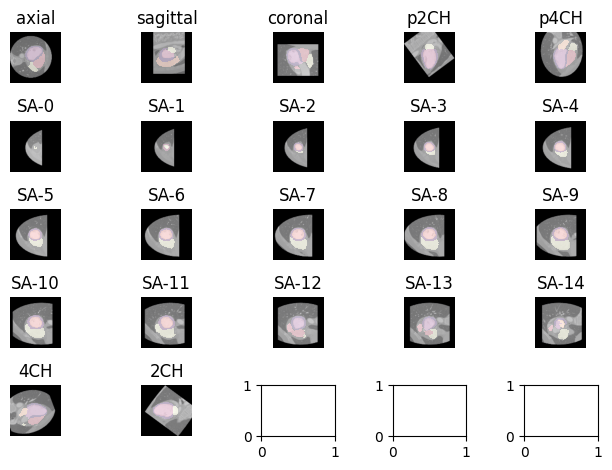



ct_train_1011_image


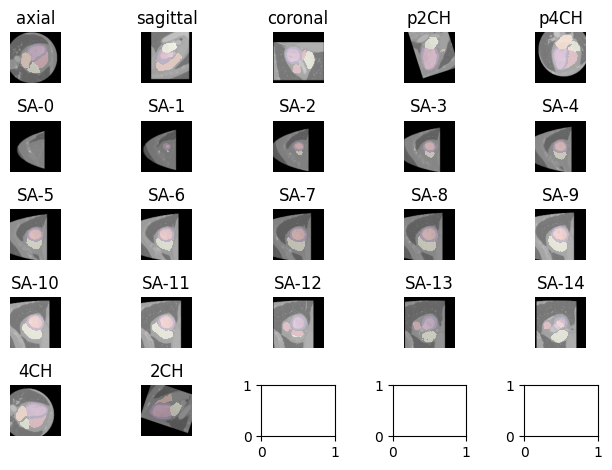



ct_train_1016_image


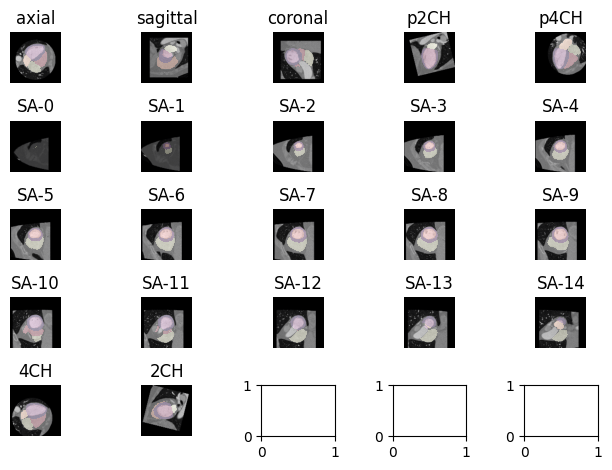



mr_train_1004_image


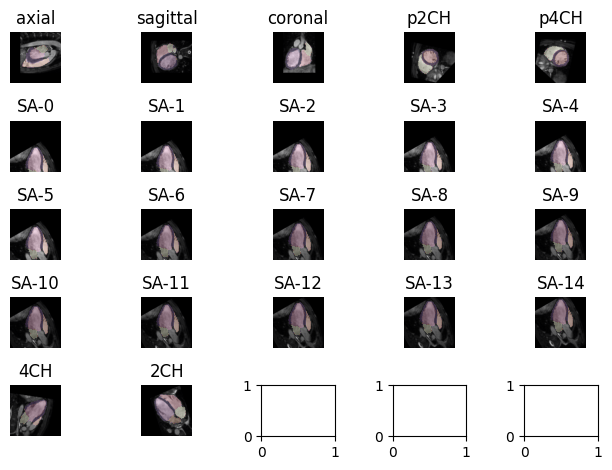



mr_train_1011_image


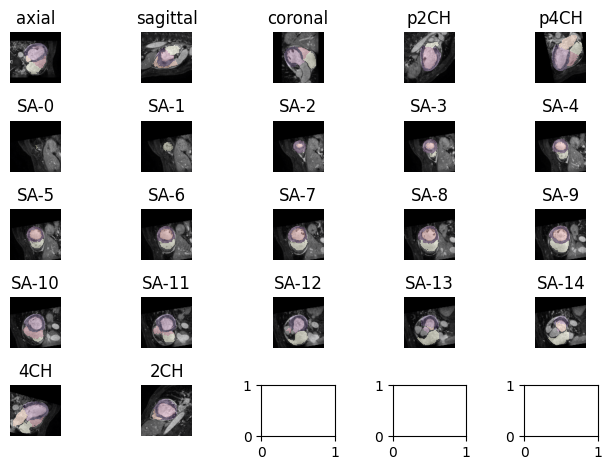



mr_train_1016_image


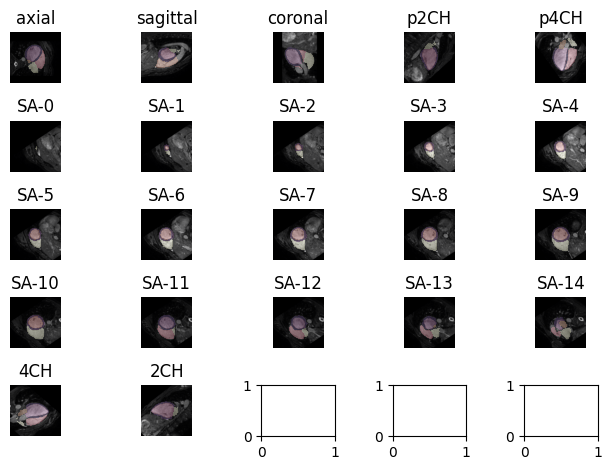



ct_train_1001_image


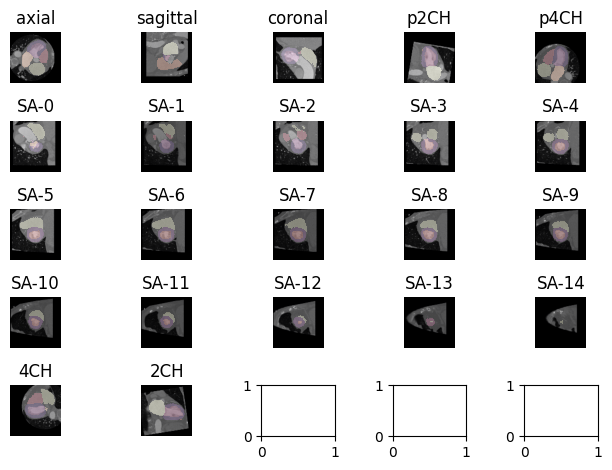



mr_train_1001_image


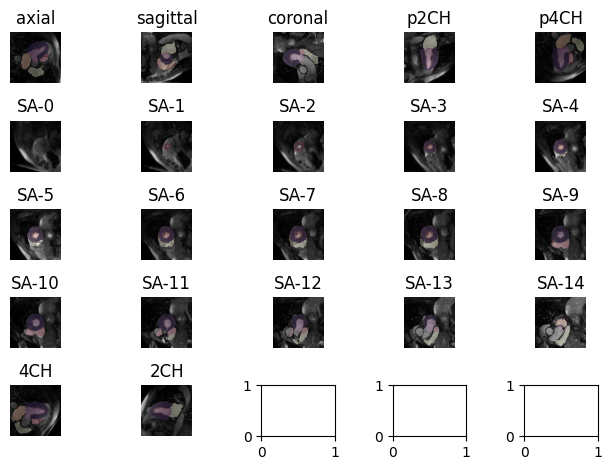

In [6]:
NUM_SA_SLICES = 15

class_dict = dict(
    MYO=1,
    LV=2,
    RV=3,
    LA=4,
    RA=5
)

if True:
    display_idx = 0
    with open(split_file_path, 'r') as f:
        split_dict = json.load(f)

    prepared_paths = split_dict['train_files'] + split_dict['test_files']

    metadata_dict = dict()

    for nii_label_path in prepared_paths:
        if not 'label' in nii_label_path: continue

        nii_image_path = nii_label_path.replace("label", "image")
        nii_label = nib.load(nii_label_path)
        nii_image = nib.load(nii_image_path)

        label = torch.as_tensor(nii_label.get_fdata()).int()
        sp_label = label.to_sparse()
        volume_affine = torch.as_tensor(nii_image.affine)
        volume = torch.as_tensor(nii_image.get_fdata())
        class_selected_sp_label = get_sub_sp_tensor(sp_label, eq_value=tuple(class_dict.values()))

        clinical_view_affines = get_clinical_cardiac_view_affines(
            class_selected_sp_label, volume_affine, class_dict, num_sa_slices=NUM_SA_SLICES, debug=False
        )

        unrolled_view_affines = {}
        for view_name, affine in clinical_view_affines.items():
            if view_name == 'ALL_SA':
                for a_idx, uaff in enumerate(affine):
                    unrolled_name = f'SA-{a_idx}'
                    unrolled_view_affines[unrolled_name] = uaff.tolist()
            else:
                unrolled_view_affines[view_name] = affine.tolist()

        image_id = nii_image_path.split('/')[-1].replace('.nii.gz', '')
        metadata_dict[image_id] = dict(view_affines=unrolled_view_affines)


        if display_idx % 5 == 0:
            # Print every 5th sample
            print(image_id)
            display_clinical_views(volume, class_selected_sp_label, volume_affine, class_dict, num_sa_slices=NUM_SA_SLICES, debug=False)
            print()
            print()

        display_idx +=1

    with open(metadata_file_path, 'w') as f:
        json.dump(metadata_dict, f, indent=4)